In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('./Frogs_MFCCs.csv')

In [19]:
family = df['Family']
species = df['Species']

In [4]:
df.drop(['Family', 'Genus', 'Species', 'RecordID', 'MFCCs_ 1'], axis=1, inplace=True)

In [ ]:
df

,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)  

In [7]:
pca.fit(df)

PCA(n_components=3)

In [8]:
df_pca = pca.transform(df)

In [9]:
pca_names = [f'pca_{i}' for i in range(len(df_pca[0]))]

In [10]:
df_pca = pd.DataFrame(df_pca, columns=pca_names)

Text(0.5, 1.0, 'Explained variance ratio')

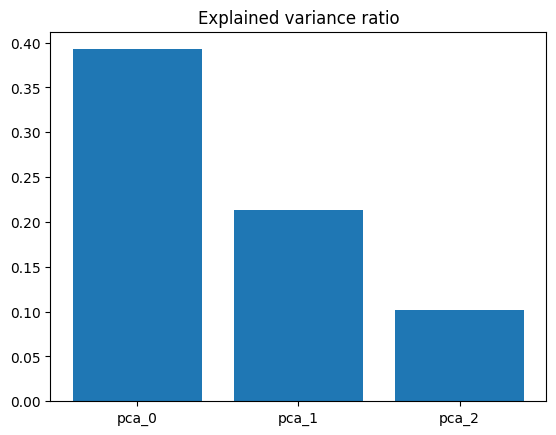

In [ ]:
plt.bar(pca_names, pca.explained_variance_ratio_)
plt.title('Explained variance ratio')

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Cumulative variance ratio')

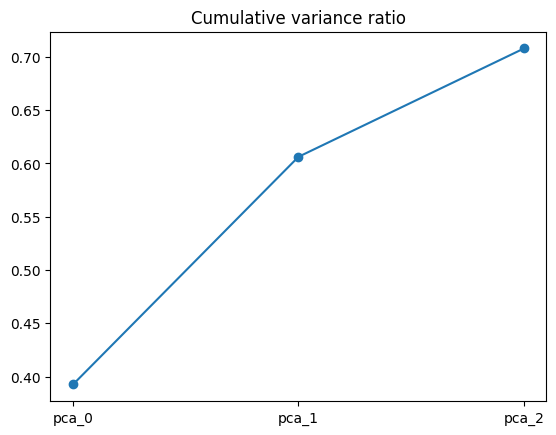

In [ ]:
plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Cumulative variance ratio')

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
minmax_scaler = MinMaxScaler()

In [13]:
df_pca_transformed = minmax_scaler.fit_transform(df_pca)

In [14]:
df_pca_transformed = pd.DataFrame(data=df_pca_transformed, columns=df_pca.columns)

In [15]:
df_full = df_pca_transformed.join(family)

In [ ]:
family.unique()

array(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'],
      dtype=object)

In [16]:
import plotly.express as px

In [ ]:
px.scatter_3d(df_full, x=df_full['pca_0'], y=df_full['pca_1'], z=df_full['pca_2'], color='Family')

In [22]:
df_full = df_pca_transformed.join(species)

In [23]:
px.scatter_3d(df_full, x=df_full['pca_0'], y=df_full['pca_1'], z=df_full['pca_2'], color='Species')

In [ ]:
df_pca_transformed.describe()

,pca_0,pca_1,pca_2
count,7195.000000,7195.000000,7195.000000
mean,0.483138,0.459948,0.460233
std,0.216344,0.147716,0.119252
min,0.000000,0.000000,0.000000
25%,0.295635,0.384790,0.387239
50%,0.493345,0.473212,0.471214
75%,0.686922,0.539564,0.523623
max,1.000000,1.000000,1.000000


In [ ]:
df_pca_transformed.to_csv('./clustering/clustering_df.csv', index=False)